In [31]:
import pandas as pd
from nltk.stem import PorterStemmer
import nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
input_path = 'https://github.com/skathirmani/datasets/raw/master/amazon_reviews_11.zip'
data = pd.read_csv(input_path)
data = data.drop('Unnamed: 0',axis=1)
data.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [4]:
all_reviews = data['reviewText'].fillna('')

In [6]:
all_reviews.to_csv('amazon_reviews_wordcloud.csv',index=False)

# Exercises

**1. Create word cloud using worlclouds api**

<img src= 'download.png'>

**2. Create a bar chart for bag of words analysis**

In [7]:
stemmer = PorterStemmer()

In [8]:
common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['','amp','rt']
all_stop_words = np.hstack([common_stop_words,custom_stop_words])
len(all_stop_words)

182

In [9]:
all_reviews = all_reviews.str.lower()
all_reviews = all_reviews.str.replace('[^a-z#@ ]','')
all_reviews = all_reviews.str.split(' ')
words_rows = all_reviews.tolist()
words_all = [] # huge list - 59k [] 
docs_clean = [] # stemmed and cleaned sentences joined with space.
words_rows_clean = [] # list of lists [ [],[],[] ... ] 

for row in words_rows:
    row_words = [stemmer.stem(word) for word in row if word not in all_stop_words]    # stemmed
    words_rows_clean.append(row_words) # clean words 
    docs_clean.append(' '.join(row_words))    
    words_all.extend(row_words)
words_all = pd.Series(words_all)

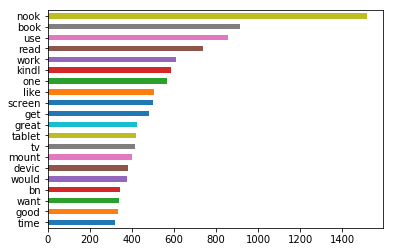

In [13]:
words_all.value_counts().head(20)[::-1].plot.barh()

**3. Building Document Term Matrix**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
model = CountVectorizer()
sparse_matrix = model.fit_transform(docs_clean)
sparse_matrix

<999x7183 sparse matrix of type '<class 'numpy.int64'>'
	with 52691 stored elements in Compressed Sparse Row format>

In [16]:
dtm = pd.DataFrame(sparse_matrix.toarray(),
                   columns = model.get_feature_names())
print(dtm.shape)
dtm.head()

(999, 7183)


,aaa,aac,abandon,abil,abl,abnorm,aboutdo,aboutif,absenc,absent,...,zbox,zero,zillion,zip,zipper,zippi,zippier,zirco,zoom,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**4. Identify top 5 large documents**

In [25]:
ids = (dtm.sum(axis=1).sort_values(ascending=False).head(5)[::-1]).keys()

In [26]:
all_reviews.iloc[ids]

248    [months, later, i, am, still, happy, with, thi...
552    [ill, be, writing, this, review, in, stages, a...
563    [paid, , for, this, in, april, , , biggest, wa...
273    [update, sepput, on, cm, , android, , last, we...
387    [edit, , update, , , big, update, rolled, out,...
Name: reviewText, dtype: object

**5. Identify percentage of zeros in the document term matrix**

In [27]:
sparse_matrix

<999x7183 sparse matrix of type '<class 'numpy.int64'>'
	with 52691 stored elements in Compressed Sparse Row format>

In [29]:
print(((999*7183) - 52691) / (999*7183))

0.9926571427337124


**6. Create a bar for chart for top 20 bigrams**

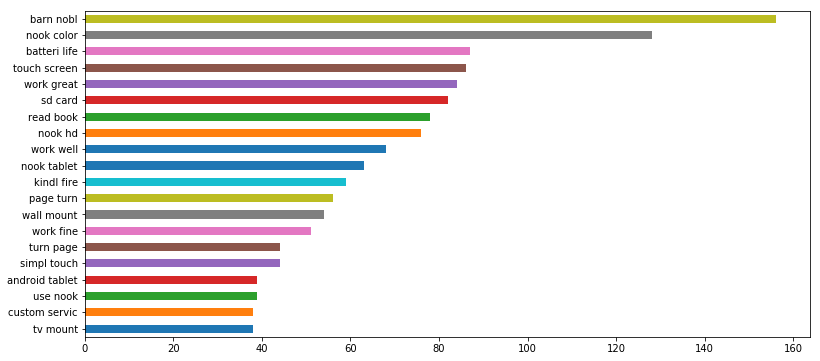

In [32]:
model2 = CountVectorizer(ngram_range=(2,2))
sparse_matrix2 = model2.fit_transform(docs_clean)
dtm2 = pd.DataFrame(sparse_matrix2.toarray(),
                   columns = model2.get_feature_names())
plt.figure(figsize=(13,6))
dtm2.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()

**Top 50 Unigrams**

In [41]:
lst = list(dtm.sum().sort_values().head(50)[::-1].keys())

In [43]:
dataframe = pd.DataFrame(sparse_matrix.toarray(),
                   columns = model.get_feature_names())

**Cosine Similarity**

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
cosine_similarity([dtm['nook'],dtm['amazon']])

array([[1.        , 0.47979502],
       [0.47979502, 1.        ]])

In [72]:
def get_similar_words(input_term):
    df_cs = pd.DataFrame(columns=['input_term','word','cs'])
    for word in dtm.columns:
        cs = cosine_similarity([dtm[word],dtm[input_term]])[0][1]
        df_cs = df_cs.append({'input_term':input_term, 'term':word, 'cs':cs}, ignore_index=True)
        
        
    df_cs = df_cs.sort_values(by='cs',ascending=False)
    df_cs = df_cs[df_cs['input_term'] != df_cs['term']].head(10)
    return(df_cs['term'].values)

get_similar_words('camera')

array(['avi', 'replay', 'filesapp', 'leftcheck', 'inferno', 'brown',
       'nooksth', 'discoveri', 'filesnow', 'filesmovi'], dtype=object)